<a href="https://colab.research.google.com/github/Monks-team/prediction_Algorithm/blob/master/hackathon_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTS


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
import torch
from torch import nn

DATA

In [124]:
data=pd.read_csv('/content/drive/My Drive/data/pre-pro.csv')

In [ ]:
data.describe()

,county,state,fips,cases,deaths,region
count,356671.000000,356671.000000,356671.000000,356671.000000,356671.000000,356671.000000
mean,917.957053,26.053739,30157.791489,591.362631,29.176647,1.352168
std,513.721169,14.394170,15321.088601,4527.553441,374.554438,1.478816
min,0.000000,0.000000,0.000000,1.000000,0.000000,-1.000000
25%,477.000000,14.000000,18105.000000,8.000000,0.000000,0.000000
50%,923.000000,25.000000,29089.000000,37.000000,1.000000,2.000000
75%,1344.000000,40.000000,45056.000000,182.000000,5.000000,2.000000
max,1828.000000,50.000000,56045.000000,227882.000000,22936.000000,4.000000


In [ ]:
data.head()

,date,county,state,fips,cases,deaths,region,state_code
0,2020-01-21,1515,47,53061.0,1,0,4,WA
1,2020-01-22,1515,47,53061.0,1,0,4,WA
2,2020-01-23,1515,47,53061.0,1,0,4,WA
3,2020-01-24,389,13,17031.0,1,0,0,IL
4,2020-01-24,1515,47,53061.0,1,0,4,WA


In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.shape

(356671, 8)

In [ ]:
data.isnull().sum()

date          0
county        0
state         0
fips          0
cases         0
deaths        0
region        0
state_code    0
dtype: int64

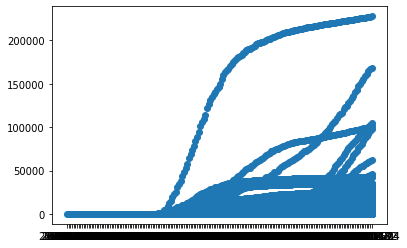

In [ ]:
X=data.date
y=data.cases
X=X.to_numpy()
y=y.to_numpy()
plt.scatter(X,y)
plt.show()

In [125]:
data = data.groupby(['region', 'date'],as_index = False).agg({'cases':sum})

In [126]:
data.region.value_counts()

 4    186
 0    183
-1    181
 3    164
 1    146
 2    146
Name: region, dtype: int64

In [127]:
reg_1=data[data['region']==-1]
reg0=data[data['region']==0]
reg1=data[data['region']==1]
reg2=data[data['region']==2]
reg3=data[data['region']==3]
reg4=data[data['region']==4]

In [128]:
reg_1.head()

,region,date,cases
0,-1,2020-01-26,1
1,-1,2020-01-27,1
2,-1,2020-01-28,1
3,-1,2020-01-29,1
4,-1,2020-01-30,1


In [ ]:
data.tail()

,region,date,cases
1001,4,2020-07-20,561991
1002,4,2020-07-21,575160
1003,4,2020-07-22,590083
1004,4,2020-07-23,603705
1005,4,2020-07-24,617486


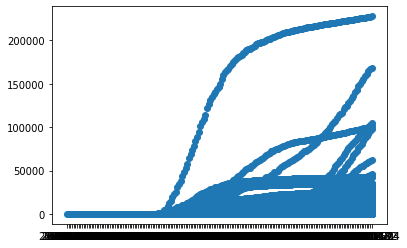

In [ ]:
X=data.date
y=data.cases
X=X.to_numpy()
y=y.to_numpy()
plt.scatter(X,y)
plt.show()

In [ ]:
data.head()

,date,cases
0,2020-01-21,1
1,2020-01-22,1
2,2020-01-23,1
3,2020-01-24,2
4,2020-01-25,3


In [156]:
rng = pd.date_range('2020-07-27', periods=20, freq='D')
df_preds = pd.DataFrame({ 'date': rng, 'cases' : 0})

In [157]:
df_preds.tail()

,date,cases
15,2020-08-11,0
16,2020-08-12,0
17,2020-08-13,0
18,2020-08-14,0
19,2020-08-15,0


In [158]:
data['date'] = pd.to_datetime(data['date'])
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year


In [129]:
def conv(data):
  data['date'] = pd.to_datetime(data['date'])
  data['day'] = data['date'].dt.day
  data['month'] = data['date'].dt.month
  data['year'] = data['date'].dt.year
  data = data.drop(columns='date')
  return data


In [130]:
reg_1 = conv(reg_1)
reg0 = conv(reg0)
reg1 = conv(reg1)
reg2 = conv(reg2)
reg3 = conv(reg3)
reg4 = conv(reg4)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [159]:
df_preds['date'] = pd.to_datetime(df_preds['date'])
df_preds['day'] = df_preds['date'].dt.day
df_preds['month'] = df_preds['date'].dt.month
df_preds['year'] = df_preds['date'].dt.year

In [ ]:
data = data.drop(columns='date')

In [160]:
df_preds = df_preds.drop(columns='date')

In [172]:
reg_1.tail()

,region,cases,day,month,year
176,-1,490113,20,7,2020
177,-1,498174,21,7,2020
178,-1,506226,22,7,2020
179,-1,515377,23,7,2020
180,-1,524320,24,7,2020


In [174]:
rng = pd.date_range('2020-07-27', periods=26, freq='D')
a = pd.Series(range(180,206))
df_preds_r_1 = pd.DataFrame({ 'date': rng,'region' : -1, 'cases' : 0})
df_preds_r_1 = df_preds_r_1.set_index([a])
df_preds_r_1.head()


,date,region,cases
180,2020-07-27,-1,0
181,2020-07-28,-1,0
182,2020-07-29,-1,0
183,2020-07-30,-1,0
184,2020-07-31,-1,0


In [ ]:
data.head()

,region,cases,day,month,year
0,-1,1,26,1,2020
1,-1,1,27,1,2020
2,-1,1,28,1,2020
3,-1,1,29,1,2020
4,-1,1,30,1,2020


In [ ]:
new_data=pd.read_csv('/content/drive/My Drive/data/pre-pro.csv')

In [ ]:
new_data['date'] = pd.to_datetime(new_data['date'])
new_data['day'] = new_data['date'].dt.day
new_data['month'] = new_data['date'].dt.month
new_data['year'] = new_data['date'].dt.year
new_data.drop(columns='date')
new_data.head()

,date,county,state,fips,cases,deaths,region,state_code,day,month,year
0,2020-01-21,1515,47,53061.0,1,0,4,WA,21,1,2020
1,2020-01-22,1515,47,53061.0,1,0,4,WA,22,1,2020
2,2020-01-23,1515,47,53061.0,1,0,4,WA,23,1,2020
3,2020-01-24,389,13,17031.0,1,0,0,IL,24,1,2020
4,2020-01-24,1515,47,53061.0,1,0,4,WA,24,1,2020


In [ ]:
new_data1=new_data.drop(columns=['date','state_code','state', 'county'])

In [ ]:
data2=new_data1
data2.head()

,fips,cases,deaths,region,day,month,year
0,53061.0,1,0,4,21,1,2020
1,53061.0,1,0,4,22,1,2020
2,53061.0,1,0,4,23,1,2020
3,17031.0,1,0,0,24,1,2020
4,53061.0,1,0,4,24,1,2020


In [ ]:
X = data.drop(['cases'], axis=1)
y = data[['cases']]
X.head()

,region,day,month,year
0,-1,26,1,2020
1,-1,27,1,2020
2,-1,28,1,2020
3,-1,29,1,2020
4,-1,30,1,2020


In [149]:
X = reg1.drop(['cases'], axis=1)
y = reg1[['cases']]


In [133]:
X.tail()

,region,day,month,year
176,-1,20,7,2020
177,-1,21,7,2020
178,-1,22,7,2020
179,-1,23,7,2020
180,-1,24,7,2020


In [ ]:
X_preds = df_preds.drop(['cases'], axis=1)
y_preds = df_preds[['cases']]
X_preds.head()

,day,month,year
0,27,7,2020
1,28,7,2020
2,29,7,2020
3,30,7,2020
4,31,7,2020


In [ ]:
a = pd.Series(range(186,206))
X_preds = X_preds.set_index([a])
y_preds = y_preds.set_index([a])

In [ ]:
y_preds.tail()

,cases
201,0
202,0
203,0
204,0
205,0


In [ ]:
X = X.append(X_preds)

In [ ]:
y = y.append(y_preds)

In [ ]:
X.tail(25)

In [150]:
X = X.to_numpy()
y = y.to_numpy()

In [ ]:
X_preds = X_preds.to_numpy()
y_preds = y_preds.to_numpy()

In [151]:
print(X.shape,y.shape)

(146, 4) (146, 1)


In [152]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x_data = sc_x.fit_transform(X)
y_data = sc_y.fit_transform(y)

In [ ]:
x_pred = sc_x.fit_transform(X_preds)
y_pred = sc_y.fit_transform(y_preds)

In [ ]:
x_data

array([[-1.404436  ,  1.20086881, -2.10879489,  0.        ],
       [-1.404436  ,  1.3162201 , -2.10879489,  0.        ],
       [-1.404436  ,  1.43157139, -2.10879489,  0.        ],
       ...,
       [ 1.42241997,  0.73946367,  1.50217985,  0.        ],
       [ 1.42241997,  0.85481495,  1.50217985,  0.        ],
       [ 1.42241997,  0.97016624,  1.50217985,  0.        ]])

In [ ]:
y_data

array([[-0.8466865 ],
       [-0.8466865 ],
       [-0.8466865 ],
       ...,
       [ 1.53625498],
       [ 1.59126501],
       [ 1.64691713]])

In [ ]:
x_pred

array([[ 1.39475361, -1.73205081,  0.        ],
       [ 1.49619023, -1.73205081,  0.        ],
       [ 1.59762686, -1.73205081,  0.        ],
       [ 1.69906348, -1.73205081,  0.        ],
       [ 1.80050011, -1.73205081,  0.        ],
       [-1.24259867,  0.57735027,  0.        ],
       [-1.14116204,  0.57735027,  0.        ],
       [-1.03972542,  0.57735027,  0.        ],
       [-0.93828879,  0.57735027,  0.        ],
       [-0.83685216,  0.57735027,  0.        ],
       [-0.73541554,  0.57735027,  0.        ],
       [-0.63397891,  0.57735027,  0.        ],
       [-0.53254229,  0.57735027,  0.        ],
       [-0.43110566,  0.57735027,  0.        ],
       [-0.32966903,  0.57735027,  0.        ],
       [-0.22823241,  0.57735027,  0.        ],
       [-0.12679578,  0.57735027,  0.        ],
       [-0.02535916,  0.57735027,  0.        ],
       [ 0.07607747,  0.57735027,  0.        ],
       [ 0.1775141 ,  0.57735027,  0.        ]])

In [ ]:
y_pred

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [137]:
class RNN(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super(RNN, self).__init__()
        
        self.hidden_dim=hidden_dim

        # define an RNN with specified parameters
        # batch_first means that the first dim of the input and output will be the batch_size
        self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first=True)
        
        # last, fully-connected layer
        self.fc = nn.Linear(hidden_dim, output_size)

    def forward(self, x, hidden):
        # x (batch_size, seq_length, input_size)
        # hidden (n_layers, batch_size, hidden_dim)
        # r_out (batch_size, time_step, hidden_size)
        batch_size = x.size(0)
        
        # get RNN outputs
        r_out, hidden = self.rnn(x, hidden)
        # shape output to be (batch_size*seq_length, hidden_dim)
        r_out = r_out.view(-1, self.hidden_dim)  
        
        # get final output 
        output = self.fc(r_out)
        
        return output, hidden

In [153]:
test_rnn = RNN(input_size=4, output_size=1, hidden_dim=10, n_layers=2)

# generate evenly spaced, test data pts

test_input = torch.Tensor(x_data).unsqueeze(0) # give it a batch_size of 1 as first dimension
print('Input size: ', test_input.size())
# test out rnn sizes
test_out, test_h = test_rnn(test_input, None)
test_out = torch.Tensor(y_data)
print('Output size: ', test_out.size())
print('Hidden state size: ', test_h.size())

Input size:  torch.Size([1, 146, 4])
Output size:  torch.Size([146, 1])
Hidden state size:  torch.Size([2, 1, 10])


In [ ]:
test_h

tensor([[[ 0.3103, -0.3470,  0.0673,  0.2513, -0.2644,  0.2679, -0.0606,
           0.1366,  0.6761, -0.0131]],

        [[ 0.1817,  0.4654,  0.1744,  0.0080, -0.7880,  0.0598,  0.4974,
           0.0480,  0.3779,  0.7833]]], grad_fn=<StackBackward>)

In [ ]:
test_out

In [154]:
# hyperparameters
input_size=4
output_size=1
hidden_dim=32
n_layers=1

# instantiate an RNN 
rnn = RNN(input_size, output_size, hidden_dim, n_layers)
print(rnn)

# MSE loss and Adam optimizer with a learning rate of 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=0.001)

RNN(
  (rnn): RNN(4, 32, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)


In [140]:
# train the RNN
def train(rnn, n_steps, print_every):
    
    # initialize the hidden state
    hidden = None      
    Y=data.cases
    for batch_i, step in enumerate(range(n_steps)):
        # defining the training data 

        x = x_data[:-1]
        y = y_data[1:]
        
        # convert data into Tensors
        x_tensor = torch.Tensor(x).unsqueeze(0) # unsqueeze gives a 1, batch_size dimension
        y_tensor = torch.Tensor(y)

        # outputs from the rnn
        prediction, hidden = rnn(x_tensor, hidden)
        
        ## Representing Memory ##
        # make a new variable for hidden and detach the hidden state from its history
        # this way, we don't backpropagate through the entire history
        hidden = hidden.data

        # calculate the loss
        loss = criterion(prediction, y_tensor)
        # zero gradients
        optimizer.zero_grad()
        # perform backprop and update weights
        loss.backward()
        optimizer.step()

        # display loss and predictions
        if batch_i%print_every == 0:
            #print("Predictions:",prediction)        
            print('Loss: ', loss.item())
            #plt.plot(Y,'r',linewidth=1,label='real-cases')
            #plt.plot(sc_y.inverse_transform(prediction.data.numpy()), 'b.',label='predicted-cases') # predictions
            plt.plot(prediction.data.numpy().flatten(), 'b.',label='predicted-cases')
            plt.show()
    
    return rnn

Loss:  0.9663447141647339


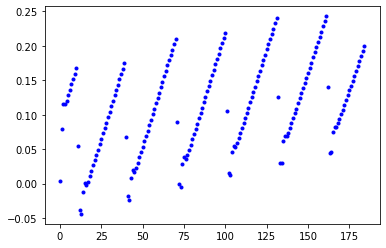

Loss:  0.07222559303045273


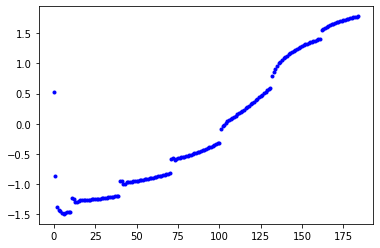

Loss:  0.030546503141522408


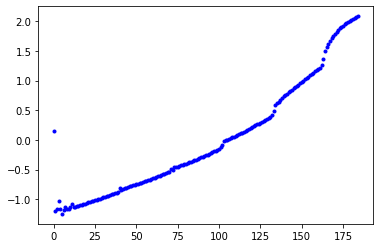

Loss:  0.024502385407686234


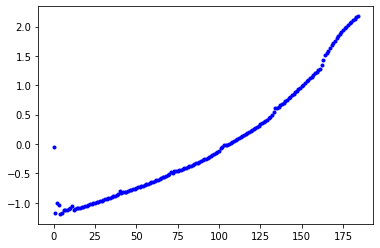

Loss:  0.019328199326992035


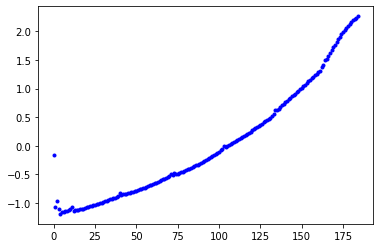

Loss:  0.015963643789291382


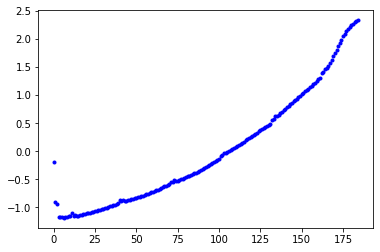

Loss:  0.01163563597947359


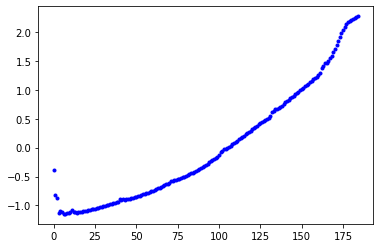

In [ ]:
# train the rnn and monitor results
n_steps = 100
print_every = 15

trained_rnn = train(rnn, n_steps, print_every)

Loss:  0.8914250135421753


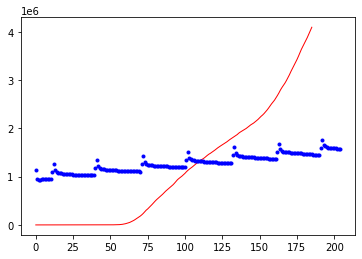

Loss:  0.5869105458259583


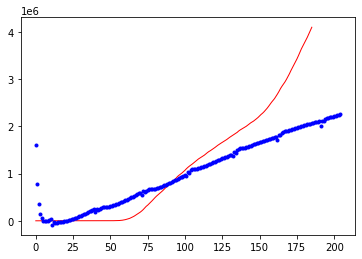

Loss:  0.536533534526825


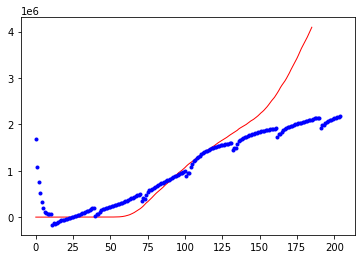

Loss:  0.5162103176116943


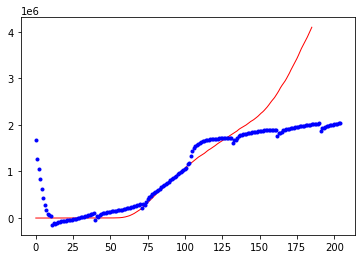

Loss:  0.5109336376190186


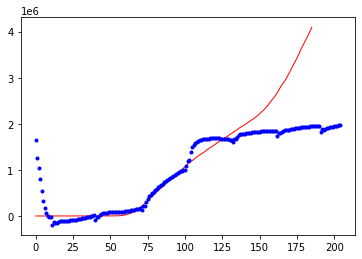

Loss:  0.5070706009864807


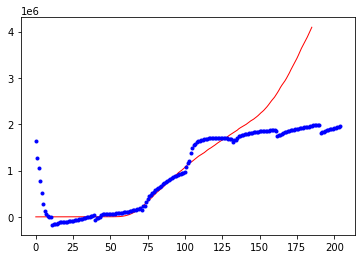

Loss:  0.5034931302070618


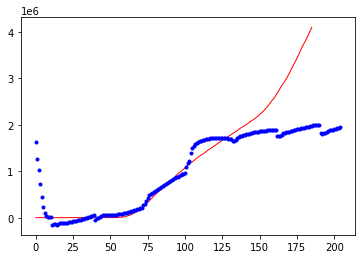

Loss:  0.4996812641620636


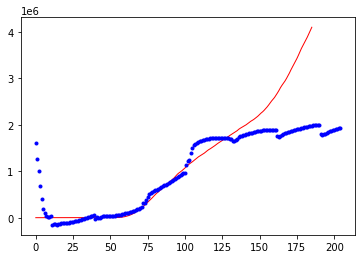

Loss:  0.4941452145576477


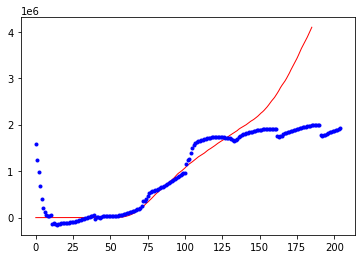

Loss:  0.4804314076900482


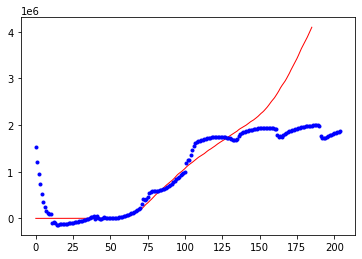

Loss:  0.3384712338447571


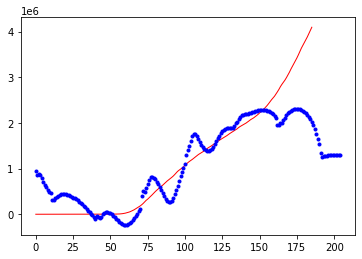

Loss:  0.3868720531463623


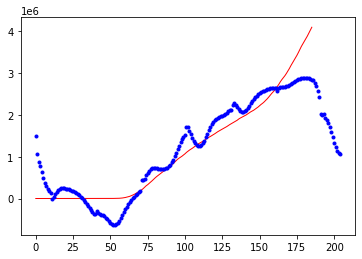

Loss:  0.15747469663619995


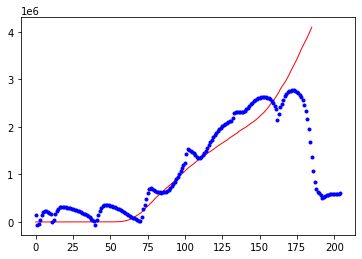

Loss:  0.0933932214975357


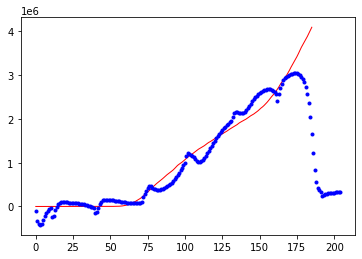

Loss:  0.06885053962469101


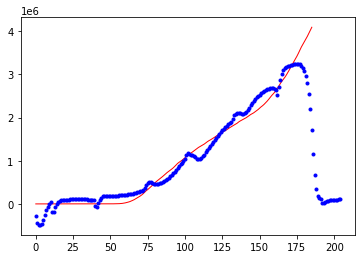

In [ ]:
n_steps = 300
print_every = 20

trained_rnn1 = train(rnn, n_steps, print_every)

Loss:  1.269457459449768


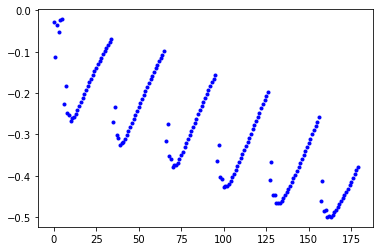

Loss:  0.08870727568864822


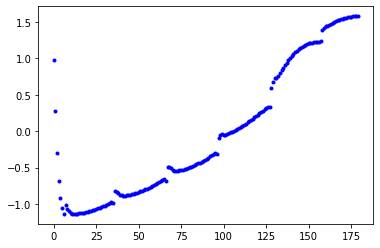

Loss:  0.04826701059937477


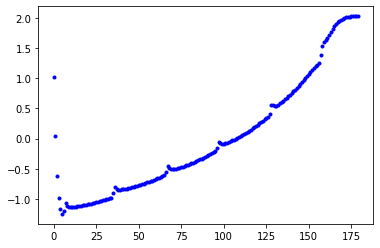

Loss:  0.0346221923828125


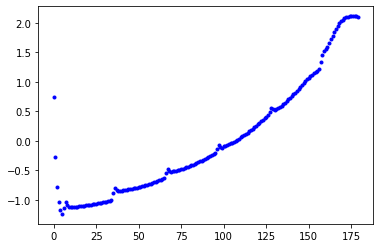

Loss:  0.024301616474986076


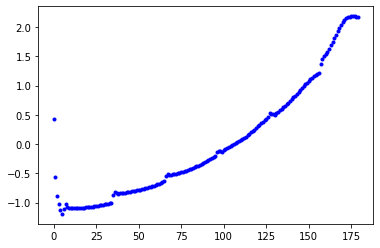

In [141]:
n_steps = 500
print_every = 100

trained_rnn_region1 = train(rnn, n_steps, print_every)

Loss:  0.9500396251678467


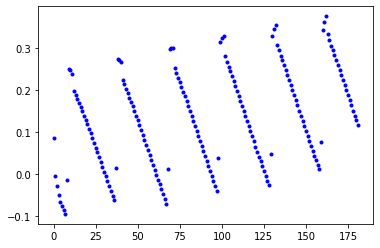

Loss:  0.048214200884103775


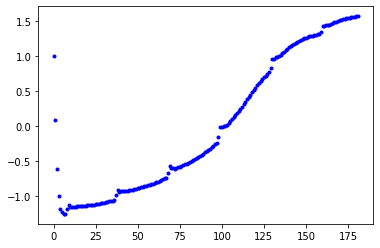

Loss:  0.03724434971809387


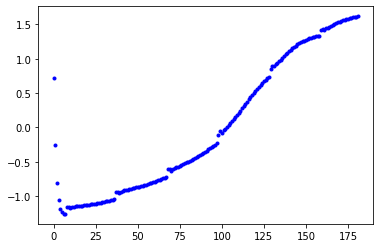

Loss:  0.027747657150030136


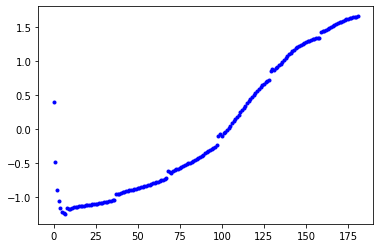

Loss:  0.016847172752022743


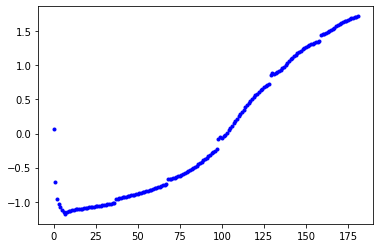

In [148]:
n_steps = 500
print_every = 100

trained_rnn_region2 = train(rnn, n_steps, print_every)

..............

Loss:  0.9414737820625305


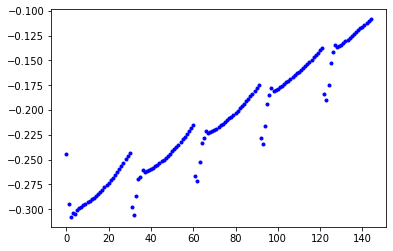

Loss:  0.05791792273521423


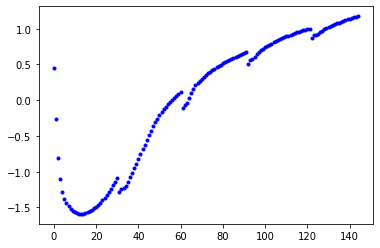

Loss:  0.03434623032808304


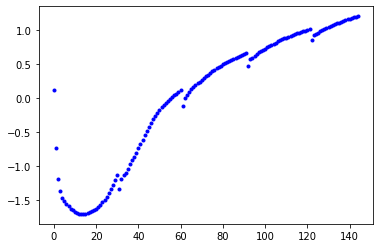

Loss:  0.022897541522979736


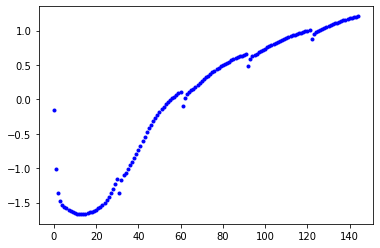

Loss:  0.015495482832193375


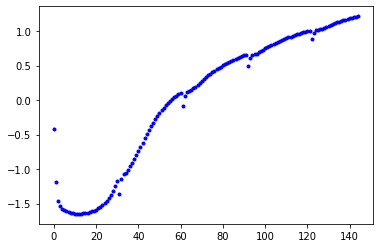

In [155]:
n_steps = 500
print_every = 100

trained_rnn_region3 = train(rnn, n_steps, print_every)

In [ ]:
n_steps = 500
print_every = 100

trained_rnn_region4 = train(rnn, n_steps, print_every)

In [ ]:
n_steps = 500
print_every = 100

trained_rnn_region5 = train(rnn, n_steps, print_every)

In [ ]:
n_steps = 500
print_every = 100

trained_rnn_region6 = train(rnn, n_steps, print_every)